In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plot
%matplotlib inline
seaborn.set()

In [50]:
df = pd.read_csv('train.csv')
sub_df= pd.read_csv('test.csv')

In [52]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [54]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [55]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [56]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [57]:
#Analyse by pivoting features

In [58]:
df[["Item_Fat_Content", "Item_Outlet_Sales"]].groupby(['Item_Fat_Content'], as_index=False).mean().sort_values(by='Item_Outlet_Sales', ascending=False)

Item_Fat_Content  Item_Outlet_Sales
2          Regular        2235.186702
1          Low Fat        2164.477336
3          low fat        2087.740737
0               LF        2073.551928
4              reg        1962.192268

In [59]:
df[["Item_Type", "Item_Outlet_Sales"]].groupby(['Item_Type'], as_index=False).mean().sort_values(by='Item_Outlet_Sales', ascending=False)

#maybe dropped..seems evenly distributed.

Item_Type  Item_Outlet_Sales
15          Starchy Foods        2374.332773
12                Seafood        2326.065928
6   Fruits and Vegetables        2289.009592
13            Snack Foods        2277.321739
9               Household        2258.784300
4                   Dairy        2232.542597
3                  Canned        2225.194904
1                  Breads        2204.132226
10                   Meat        2158.977911
7             Hard Drinks        2139.221622
5            Frozen Foods        2132.867744
2               Breakfast        2111.808651
8      Health and Hygiene        2010.000265
14            Soft Drinks        2006.511735
0            Baking Goods        1952.971207
11                 Others        1926.139702

In [60]:
df[["Outlet_Identifier", "Item_Outlet_Sales"]].groupby(['Outlet_Identifier'], as_index=False).mean().sort_values(by='Item_Outlet_Sales', ascending=False)

Outlet_Identifier  Item_Outlet_Sales
5            OUT027        3694.038558
6            OUT035        2438.841866
9            OUT049        2348.354635
2            OUT017        2340.675263
1            OUT013        2298.995256
8            OUT046        2277.844267
7            OUT045        2192.384798
3            OUT018        1995.498739
4            OUT019         340.329723
0            OUT010         339.351662

In [61]:
df[["Outlet_Establishment_Year", "Item_Outlet_Sales"]].groupby(['Outlet_Establishment_Year'], as_index=False).mean().sort_values(by='Item_Outlet_Sales', ascending=False)

Outlet_Establishment_Year  Item_Outlet_Sales
0                       1985        2483.677474
6                       2004        2438.841866
4                       1999        2348.354635
7                       2007        2340.675263
1                       1987        2298.995256
2                       1997        2277.844267
5                       2002        2192.384798
8                       2009        1995.498739
3                       1998         339.351662

In [62]:
df[["Outlet_Size", "Item_Outlet_Sales"]].groupby(['Outlet_Size'], as_index=False).mean().sort_values(by='Item_Outlet_Sales', ascending=False)

Outlet_Size  Item_Outlet_Sales
1      Medium        2681.603542
0        High        2298.995256
2       Small        1912.149161

In [63]:
df[["Outlet_Location_Type", "Item_Outlet_Sales"]].groupby(['Outlet_Location_Type'], as_index=False).mean().sort_values(by='Item_Outlet_Sales', ascending=False)

Outlet_Location_Type  Item_Outlet_Sales
1               Tier 2        2323.990559
2               Tier 3        2279.627651
0               Tier 1        1876.909159

In [64]:
df[["Outlet_Type", "Item_Outlet_Sales"]].groupby(['Outlet_Type'], as_index=False).mean().sort_values(by='Item_Outlet_Sales', ascending=False)

Outlet_Type  Item_Outlet_Sales
3  Supermarket Type3        3694.038558
1  Supermarket Type1        2316.181148
2  Supermarket Type2        1995.498739
0      Grocery Store         339.828500

In [65]:
#super markets are way ahead of groceries


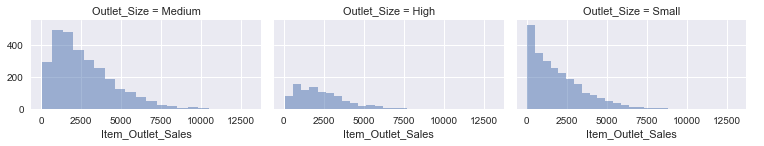

In [69]:
#data visualization

grid = sns.FacetGrid(df, col='Outlet_Size',  size=2.2, aspect=1.6)
grid.map(plot.hist, 'Item_Outlet_Sales', alpha=.5, bins=20)
grid.add_legend();

In [80]:
'''Pre processing of data'''

#filling item weight with mean value

df['Item_Weight']=df['Item_Weight'].fillna(12.85)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [71]:
#filling outlet size with 'Medium'

df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [72]:
#Mapping Fat Content to int
fat_map={'Low Fat':4, 'Regular':5, 'low fat':3, 'LF':2, 'reg':1}
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(fat_map)

In [73]:
outlets_map={'OUT049':8, 'OUT018':3, 'OUT010':1, 'OUT013':6, 'OUT027':10, 'OUT045':4,'OUT017':7, 'OUT046':5, 'OUT035':9, 'OUT019':2}
df['Outlet_Identifier']=df['Outlet_Identifier'].replace(outlets_map)

In [74]:
outlet_size_map={'Small':1,'Medium':2,'High':3}
df['Outlet_Size']=df['Outlet_Size'].replace(outlet_size_map)

In [75]:
df=df[[ 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_MRP', 'Outlet_Identifier',
        'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']]
df.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
0         9.30                 4         0.016047  249.8092   
1         5.92                 5         0.019278   48.2692   
2        17.50                 4         0.016760  141.6180   
3        19.20                 5         0.000000  182.0950   
4         8.93                 4         0.000000   53.8614   

   Outlet_Identifier  Outlet_Size Outlet_Location_Type        Outlet_Type  \
0                  8            2               Tier 1  Supermarket Type1   
1                  3            2               Tier 3  Supermarket Type2   
2                  8            2               Tier 1  Supermarket Type1   
3                  1            2               Tier 3      Grocery Store   
4                  6            3               Tier 3  Supermarket Type1   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

In [76]:
outlet_loctype_map={'Tier 1':1,'Tier 2':2,'Tier 3':3}
df['Outlet_Location_Type']=df['Outlet_Location_Type'].replace(outlet_loctype_map)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [77]:
outlet_type_map={'Grocery Store':4,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3}
df['Outlet_Type']=df['Outlet_Type'].replace(outlet_type_map)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [85]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
import random as rnd
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [82]:
#Model Training
train=df.sample(frac=0.7,random_state=200)
test=df.drop(train.index)

train=train.reset_index()
train=train[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']]
test=test.reset_index()
test=test[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']]


In [83]:
X_train = train[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]
Y_train = train["Item_Outlet_Sales"]
X_test  = test[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]
Y_test=test["Item_Outlet_Sales"]


In [ ]:
#linear regression

regr =LinearRegression()
regr.fit(X_train,Y_train)
# Make predictions using the testing set
Y_pred = regr.predict(X_test)
regr.score(X_test,Y_test)